In [4]:
import torch
from numpy import genfromtxt
data = genfromtxt('C:/HKU/Self learning/Machine Learning/ex2/ex2data2.txt', delimiter=',')
data = torch.from_numpy(data)
data = torch.chunk(data,3,1)

In [5]:
def normal(data):
    return (data-torch.mean(data))/torch.pow(torch.var(data),0.5)
new1 = normal(data[0])
new2 = normal(data[1])
new3 = normal(torch.mul(data[0],data[1]))
new4 = normal(torch.pow(data[0],2))
new5 = normal(torch.pow(data[1],2))
new6 = normal(torch.pow(data[0],3))
new7 = normal(torch.pow(data[1],3))

In [20]:
inputs = torch.cat((new1,new2,new3,new4,new5,new6,new7),1).float()
targets = data[2].float()
print(inputs.shape)
from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs,targets)

from torch.utils.data import DataLoader
# Define data loader
batch_size = 118
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(train_ds, batch_size)

torch.Size([118, 7])


In [21]:
import torch.nn as nn
import torch.nn.functional as F
class Mymodel(nn.Module):
    def __init__(self,input_size,num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    def train_step(self,batch):
        inputs,targets = batch
        outputs = self.linear(inputs)
        targets = targets.squeeze(1).long()
        #sigmoid = 1/(1+torch.exp(-outputs*0.01))
        #loss = torch.sum(-torch.mul(targets, torch.log(sigmoid))-torch.mul(1-targets,torch.log(1-sigmoid)))
        loss = F.cross_entropy(outputs, targets) # Calculate loss
        return loss
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self.linear(inputs)              # Generate predictions
        targets = targets.squeeze(1).long()
        loss = F.cross_entropy(out, targets)   # Calculate loss
        #acc = accuracy(out, targets)           # Calculate accuracy
        _, preds = torch.max(out,dim=1)
        acc = torch.sum(preds==targets)/len(preds)
        return {'val_loss': loss, 'val_acc': acc}

In [25]:
def fit(epochs,train_dl,val_dl,model,opt):
    history = []
    for epoch in range(epochs):
        for batch in train_dl:
            loss = model.train_step(batch)     
            loss.backward()
            opt.step()
            opt.zero_grad()
            break
        if (epoch+1) % 10 == 0:
            for batch in val_dl:
                result = model.validation_step(batch)
                history.append(result)
    return history

In [33]:
model = Mymodel(7,2)
opt = torch.optim.SGD(model.parameters(), lr = 0.01)
list(model.parameters())

[Parameter containing:
 tensor([[-0.2007, -0.2676, -0.3081, -0.0636, -0.2600, -0.3201,  0.1928],
         [-0.1256, -0.3032, -0.3536, -0.0061,  0.1965, -0.2082,  0.1907]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.2303,  0.0104], requires_grad=True)]

In [34]:
print(model.linear(inputs)[0:10])
print(targets[0:10])
for batch in val_dl:
    result0 = model.validation_step(batch)
    print(result0)
    print(F.softmax(model.linear(inputs)[0:10], dim=1))

tensor([[-0.5005, -0.0887],
        [-0.2925,  0.0874],
        [-0.1334,  0.2658],
        [ 0.1972,  0.2348],
        [ 0.4234,  0.3911],
        [ 0.4941,  0.1736],
        [ 0.3694, -0.0021],
        [ 0.2887, -0.0116],
        [ 0.1977,  0.1675],
        [ 0.1513,  0.3253]], grad_fn=<SliceBackward>)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
{'val_loss': tensor(0.8022, grad_fn=<NllLossBackward>), 'val_acc': tensor(0.4153)}
tensor([[0.3985, 0.6015],
        [0.4062, 0.5938],
        [0.4015, 0.5985],
        [0.4906, 0.5094],
        [0.5081, 0.4919],
        [0.5794, 0.4206],
        [0.5918, 0.4082],
        [0.5745, 0.4255],
        [0.5076, 0.4924],
        [0.4566, 0.5434]], grad_fn=<SoftmaxBackward>)


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
history = [result0] + fit(1000,train_dl,val_dl,model,opt)
#history1 = fit(200,train_dl,val_dl,model,opt)

In [31]:
for batch in val_dl:
    inputs, targets = batch 
    out = model.linear(inputs)              # Generate predictions
    print(out[95:100])
    targets = targets.squeeze(1).long()
    _, preds = torch.max(out,dim=1)
    print(preds)
    print(targets)
    acc = torch.sum(preds==targets)/len(preds)
    print(acc)

tensor([[ 0.5181, -1.1730],
        [ 0.8082, -1.5336],
        [ 0.2714, -0.5711],
        [ 1.2428, -1.4057],
        [ 1.5716, -1.0185]], grad_fn=<SliceBackward>)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor(0.8051)


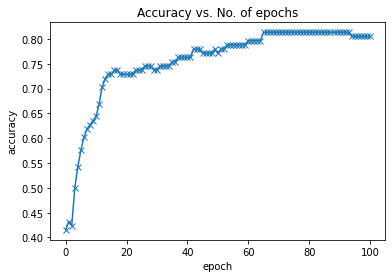

In [36]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

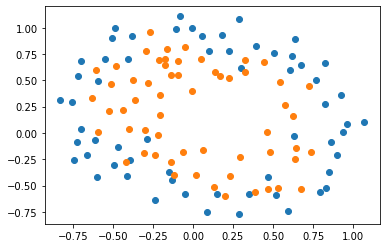

In [61]:
data = genfromtxt('C:/HKU/Self learning/Machine Learning/ex2/ex2data2.txt', delimiter=',')
plt.scatter(data[0:118,0][data[0:118,2]==0],data[0:118,1][data[0:118,2]==0])
plt.scatter(data[0:118,0][data[0:118,2]==1],data[0:118,1][data[0:118,2]==1])